In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0], inplace=True)
# To replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the score with the most occuring scores so that data follows the general trend

In [6]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0], inplace=True)
# To replace the missing values in the 'TOEFL Score' column with the mode of the column
# Mode has been used here to replace the score with the most occuring scores so that data follows the general trend

In [7]:
df['University Rating'].fillna(df['University Rating'].mode()[0], inplace=True)
# To replace the missing values in the 'University Rating' column with the mode of the column
# Mode has been used here to replace the score with the most occuring scores so that data follows the general trend

In [8]:
x = df.drop(['Chance of Admit','Serial No.'], axis=1)
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate

In [9]:
# target column
y = df['Chance of Admit']

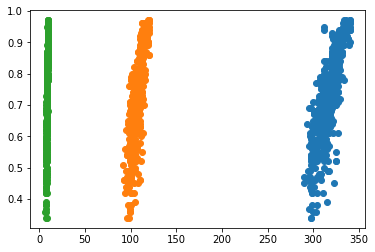

In [10]:
plt.scatter(df['GRE Score'],y) # Relationship between GRE Score and Chance of Admission
plt.scatter(df['TOEFL Score'],y) # Relationship between TOEFL Score and Chance of Admission
plt.scatter(df['CGPA'],y) # Relationship between CGPA and Chance of Admission

In [11]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=100)

In [12]:
# fitting the date to the Linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [14]:
# calucltaing the accuracy of the model
from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)
score

0.8076681567897024

In [16]:
import pickle
# saving the model to the local file system
filename = 'linear_model.pickle'
pickle.dump(reg, open(filename, 'wb'))